(C) Gerold Baier, University College London, 2024

# Complex Dynamical Systems

We will study brain activity with invasive recordings in humans. Brain activity is an example of a complex dynamical system. 


Invasive recordings (lasting for a few days) can only be done under strict clinical restrictions, e.g. to prepare for brain surgery. Nevertheless, they allow to find out what is going on in the brain while the human subject lives a (comparatively) normal life. This is normally not possible under any other conditions. 


# Stereo Electroencephalography

Insulated needles are implanted in patients to record electric brain activity.

![](Figs/01_stereo_electrodes_scheme.png)


The technique is called stereo electroencephalography (sEEG) and dates from the 1960s.

![](Figs/03_electrodes_implanted_1962.png)

This is the display of a full implantation based on a CT of the patient.

![](Figs/04_electrodes_implanted_2020.png)

Goal of the recording is to find the best location for surgery.

Until today, most clinical analysis is done by visual inspection.

![](Figs/05_Recording_IED_Onset.png)

Having access to digitally recordings, we can use data science, machine learning, and mathematical modelling to  better understand the human EEG.

If successful, we can build a new theory of how the brain works.



Until today, most clinical analysis is done by visual inspection.

![](Figs/05_Recording_IED_Onset.png)

Having access to digitally recordings, we can use data science, machine learning, and mathematical modelling to  better understand the human EEG.

If successful, we can build a new theory of how the brain works.

# Import Data

Import one minute of recording
 
You will need Pandas, Numpy, Matplotlib. 

```conda install pandas```


In [1]:
from pandas import read_csv
from numpy import asarray

In [2]:
# read prefiltered 20 sec segment

chars        = '../Data/sampling_rate.txt'

df1          = read_csv(chars, header=None)

sr           = df1.iloc[0, 0]

series_chars = '../Data/Pat1_Sz01.csv'

df2 = read_csv(series_chars)

data_np = df2.to_numpy()
data_prefiltered = data_np[:, 1:]

all_labels = df2.columns[1:]
    
all_labels_np = asarray(all_labels)

letter_list = list()

for new in all_labels:
    
    if new[0] not in letter_list:
        
        letter_list.append(new[0])


label_dict = dict()

for ind, letter in enumerate(all_labels):
    
    if letter[0] in label_dict.keys():
            pass

    else:
        label_dict[letter[0]] = [ind]   
        
        dict_ind = len(label_dict.keys())
        
        if letter[0] != all_labels[0][0]:
            previous_letter = letter_list[dict_ind - 2]
            label_dict[previous_letter].append(ind)
            
    if ind == len(all_labels)-1:  
        label_dict[letter[0]].append(ind+1)

label_letters = list(label_dict.keys())

label_dict

{'A': [0, 11],
 'B': [11, 22],
 'C': [22, 31],
 'E': [31, 40],
 'F': [40, 49],
 'Z': [49, 56],
 'O': [56, 67],
 'T': [67, 74],
 'U': [74, 81],
 'V': [81, 92],
 'W': [92, 107],
 'X': [107, 122]}

# First Look at the sEEG

In [3]:
data_prefiltered.shape

(60000, 122)

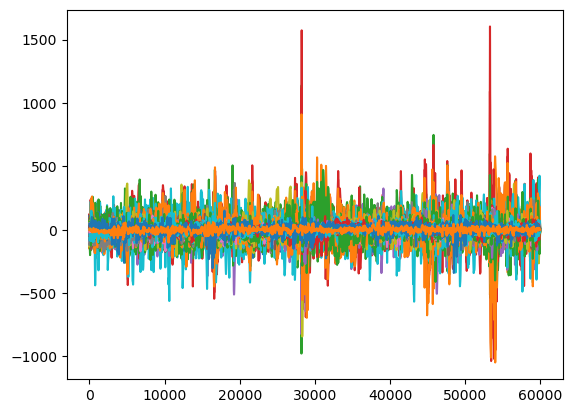

In [4]:
from matplotlib.pyplot import subplots

fig, ax = subplots()

ax.plot(data_prefiltered);

These data contain 60 seconds at a sampling rate of 1000 Hz.


In [5]:
def my_eeg_plot(data, factor):
    '''
    plot time series with offset
    '''
    from numpy import arange, linspace
    
    columns = data.shape[1]
    
    offset = arange(columns)
    
    fig, ax = subplots()
        
    ax.plot(data + offset*factor, c='gray')
    ax.set_yticks([])
    ax.set_xticks(linspace(0, data.shape[0], 3))
    ax.set_xticklabels(linspace(0, data.shape[0]//sr, 3))
    ax.set_xlabel("Time (seconds)")

    return fig, ax


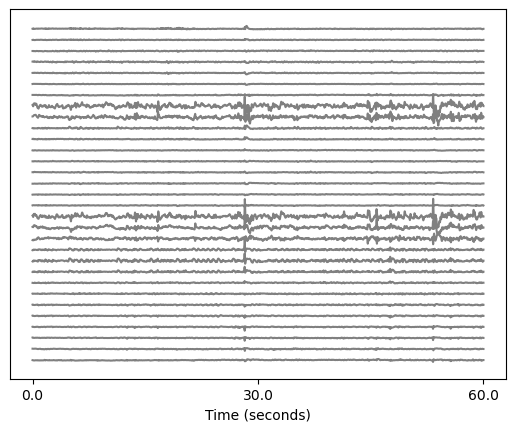

In [6]:
my_eeg_plot(data_prefiltered[:, :31], 1000);

# Conclusion

sEEG is a medically important recording in neurosurgery but the signal is surprisingly unspecific and for the most part looks like noisy fluctuations. 

This changes when the subject has an epileptic seizure (as we will see later). However, the random nature is in contrast to the common assumption that the brain is not a noise generator but a sophisticated information processor. It is dynamic nature is (by and large) at present not understood and thus an important application for dynamical systems theory. 


# Try It Yourself

> Modify the code to display data where each column has been normalised to have `mean=0` and `std=1`.

> Describe what you see. You can change the selection by slicing the Numpy array.


# Notes on the Reading

## The History and Principles of Stereo EEG, by Patrick Chauvel

A lot of literature is available about EEG recordings from the surface of the skull (the normal way of recording). This unique review by Chauvel explains the history of how invasive recordings have been made possible. Look at figure 1.1 to see how complicated it is to make sure that the needles find their right position in the brain. 

## Physiological Activity Recorded With Intracranial EEG, by Laure Peter-Derex, Nicolás von Ellenrieder, and Birgit Frauscher

This overview paper shows how clinical neurologists deal with the interpretation of the signals recorded invasively. A major focus is to decide whether some unusual feature is relevant or an unwanted recording artifact. Conclusions made without proper training in this area are often useless. 

As you can see in Fig. 24.1, there are specific features which are considered normal if the subject is awake. Other features, as shown in 24.3, are typical findings during sleep and do not present abnormality.
